### Life Cycle of Data Science Project
1.Data Analysis

2.Feature Engineering

3.Feature selection

4.Model Building

5.Model Deployment

## Exploratory Data Analysis Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


C:\Users\Shihab Uddin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas.util.testing as tm

In [3]:
#Display all the columns
pd.pandas.set_option('display.max_columns',None)

In [4]:
# Load the dataset
path = "F:\\Advance house price regression\\train.csv"
data = pd.read_csv(path)
print(data.shape)

(1460, 81)


In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## In data analysis we will try to find out....
1.Missing Values<br>
2.All numerical Variables<br>
3.Distribution of Numerical Variables<br>
4.Categorical Variables<br>
5.Cardinality of Categorical Variables<br>
6.Outliers<br>
7.Relationship between independent and dependent Variables(SalesPrice)<br>

## Let's find out missing values

In [5]:
featuresWithNaN = [features for features in data.columns if data[features].isnull().sum()>1]

for feature in featuresWithNaN:
    print(feature,np.round(data[feature].isnull().mean(),4),'% missing Values')

LotFrontage 0.1774 % missing Values
Alley 0.9377 % missing Values
MasVnrType 0.0055 % missing Values
MasVnrArea 0.0055 % missing Values
BsmtQual 0.0253 % missing Values
BsmtCond 0.0253 % missing Values
BsmtExposure 0.026 % missing Values
BsmtFinType1 0.0253 % missing Values
BsmtFinType2 0.026 % missing Values
FireplaceQu 0.4726 % missing Values
GarageType 0.0555 % missing Values
GarageYrBlt 0.0555 % missing Values
GarageFinish 0.0555 % missing Values
GarageQual 0.0555 % missing Values
GarageCond 0.0555 % missing Values
PoolQC 0.9952 % missing Values
Fence 0.8075 % missing Values
MiscFeature 0.963 % missing Values


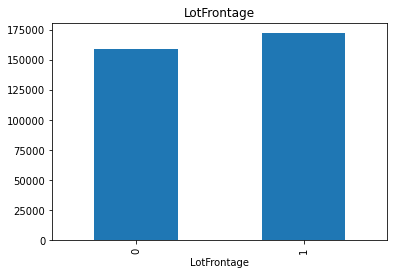

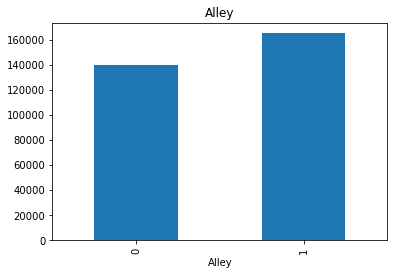

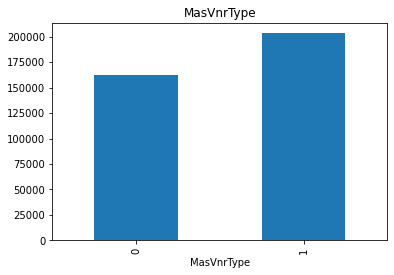

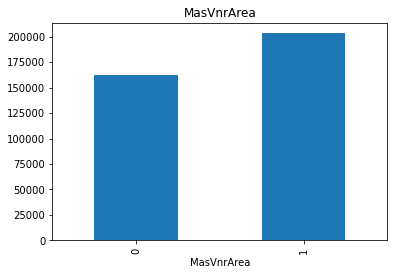

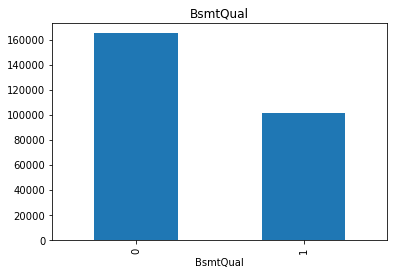

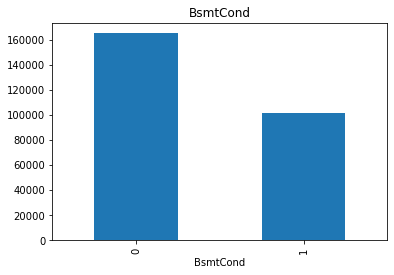

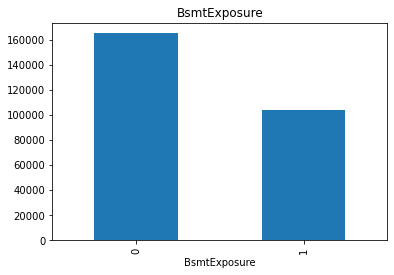

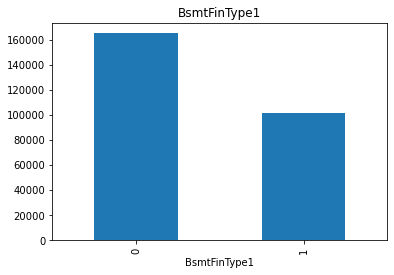

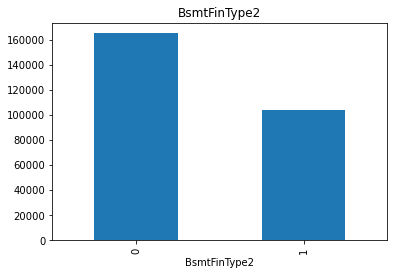

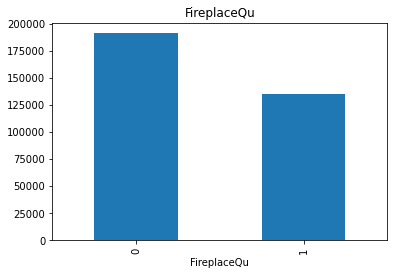

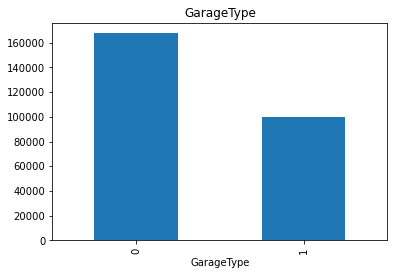

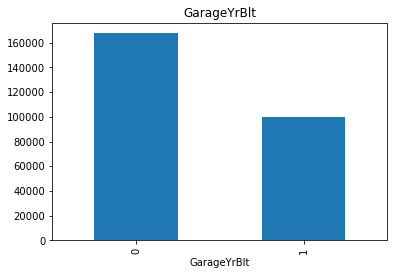

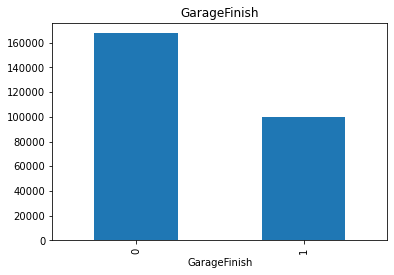

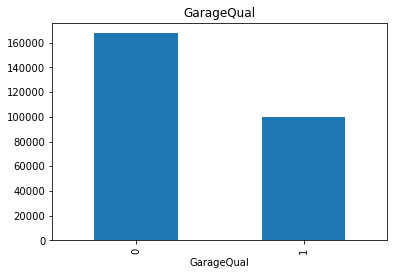

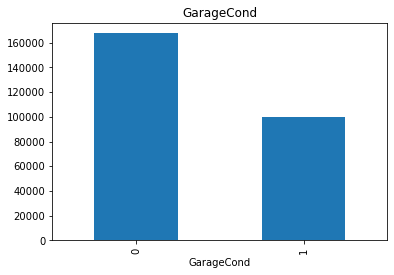

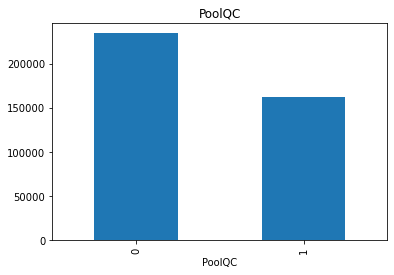

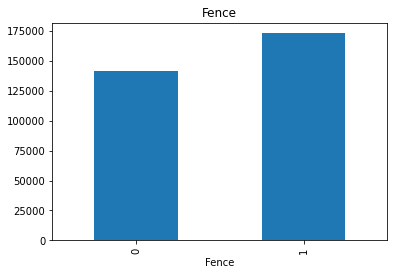

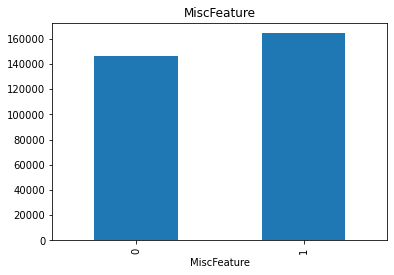

In [6]:
for features in featuresWithNaN:
    dataset = data.copy()
    
    dataset[features] = np.where(dataset[features].isnull(),1,0)
    
    dataset.groupby(features)['SalePrice'].median().plot.bar()
    
    plt.title(features)
    plt.show()
#     for features,features_df in g:
#         print(features)
#         print(features_df)

In [7]:
#Let's see numerical variables

numerical_feature = [feature for feature in data.columns if data[feature].dtypes !='O']
print(f"Number of Numerical Variables: {len(numerical_feature)}")



Number of Numerical Variables: 38


In [8]:
data[numerical_feature].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [9]:
#let's find out the year variables

year_feature = [feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [10]:
data[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


Text(0, 0.5, 'House Price')

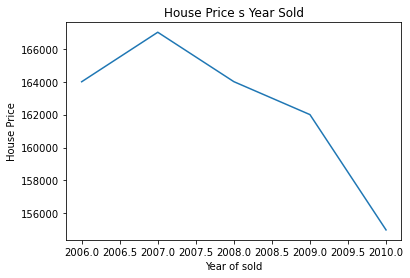

In [11]:
#Let's analyze the Temporal datetime variables
#let's see ,is there any relationship between sales price and YrSold

data.groupby('YrSold')['SalePrice'].median().plot()
plt.title("House Price s Year Sold")
plt.xlabel("Year of sold")
plt.ylabel("House Price")

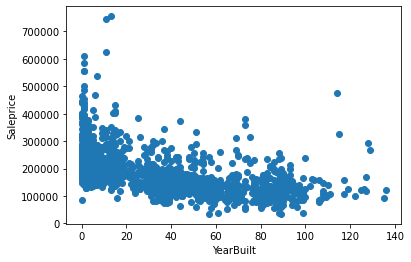

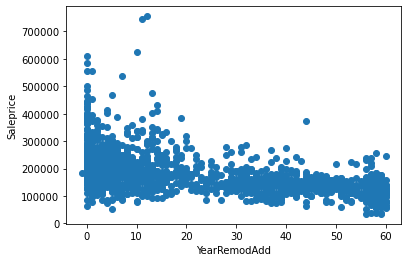

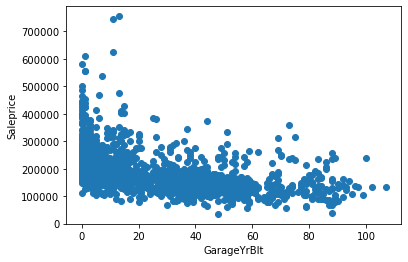

In [12]:
#Let's compare the difference between all years features with salesprice

for feature in year_feature:
    if feature != 'YrSold':
        dataset = data.copy()
        dataset[feature] = dataset['YrSold']-dataset[feature]
        
        plt.scatter(dataset[feature],dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Saleprice')
        plt.show()

In [13]:
#Let's see all the discrite values in the dataframe
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
print(f"no of discrete variables {discrete_feature}")

no of discrete variables ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [14]:
data[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


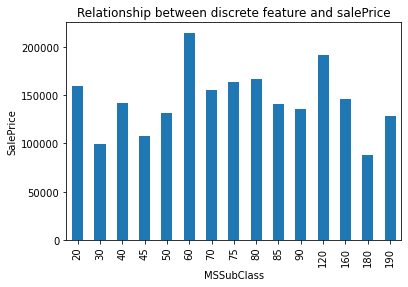

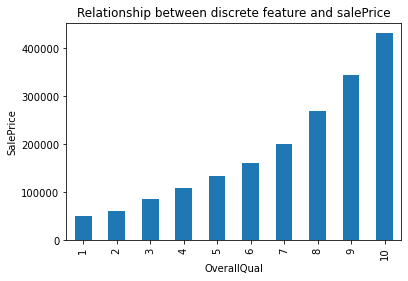

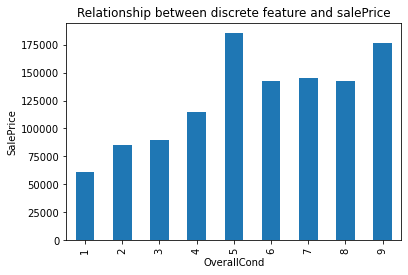

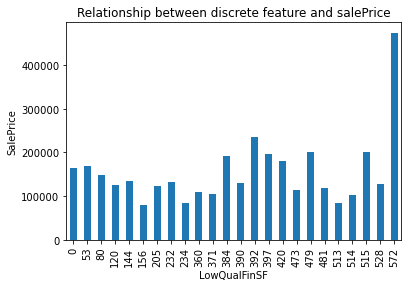

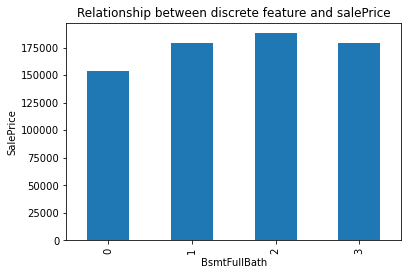

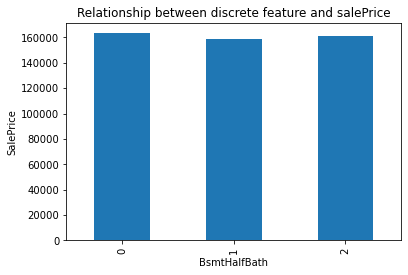

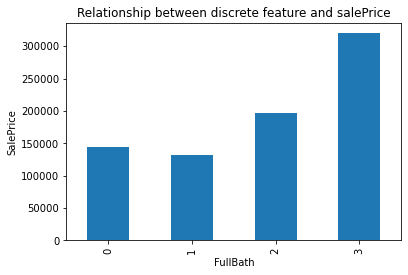

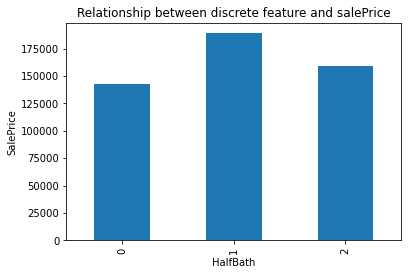

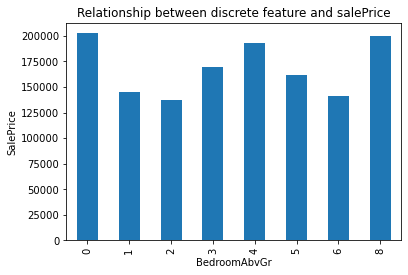

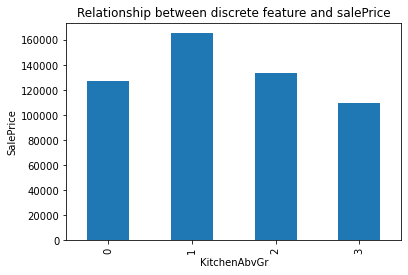

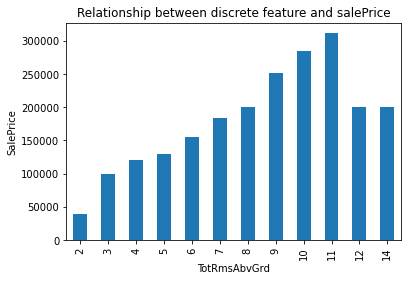

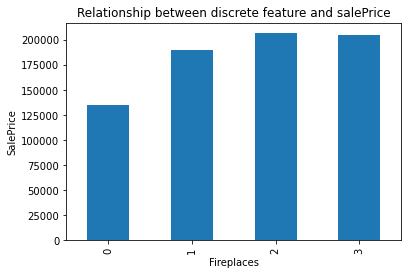

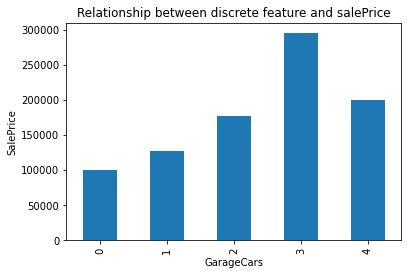

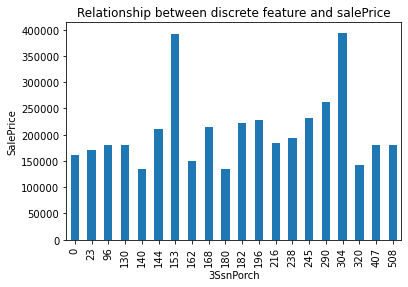

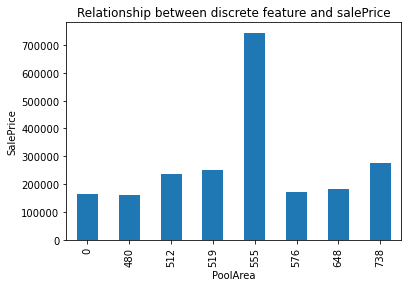

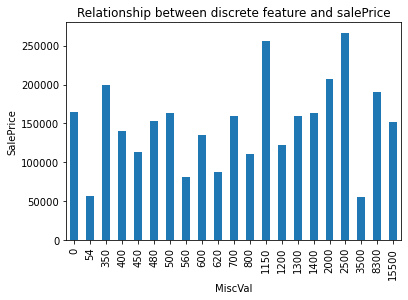

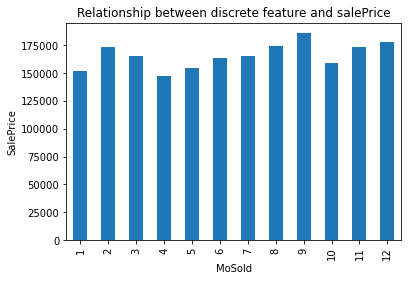

In [15]:
#Let's see the relationship between them and salePrice


for feature in discrete_feature:
    dataset = data.copy()
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title('Relationship between discrete feature and salePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [16]:
#Let's see continuous feature

continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature+year_feature+['Id']]
print(f"No of continuous variables: {len(continuous_feature)}")

No of continuous variables: 16


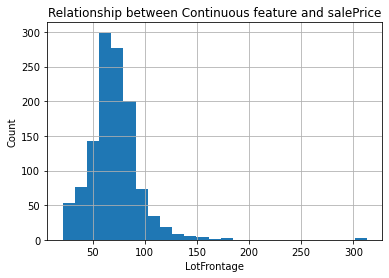

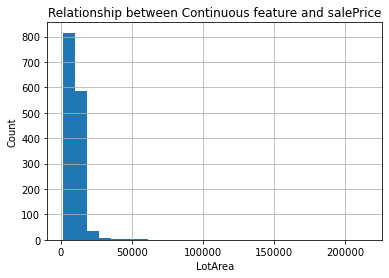

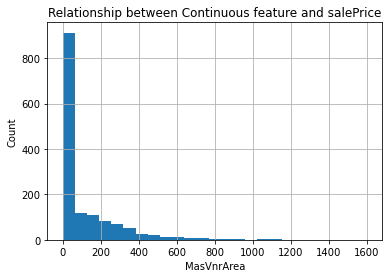

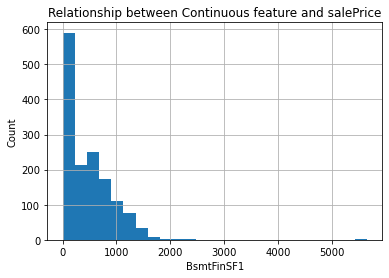

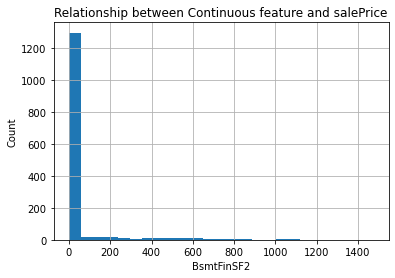

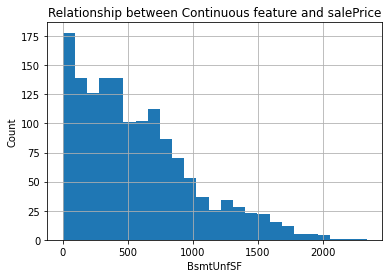

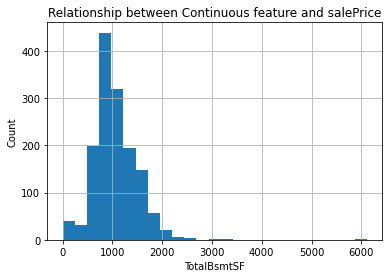

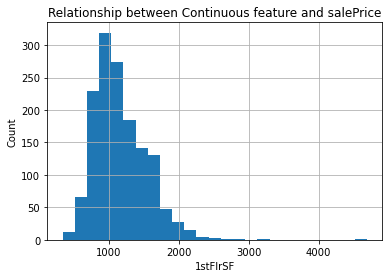

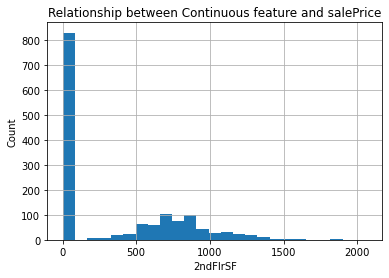

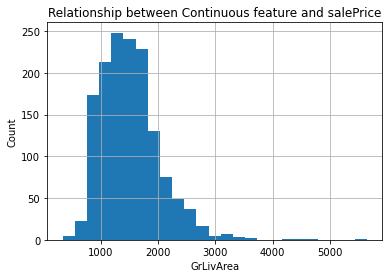

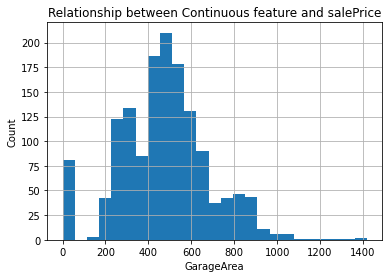

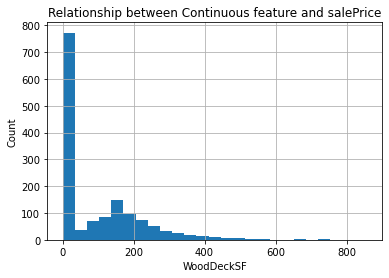

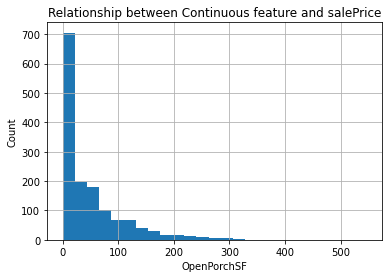

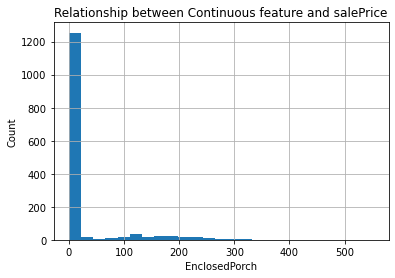

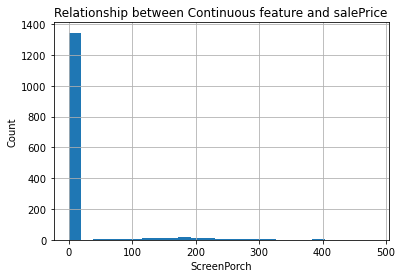

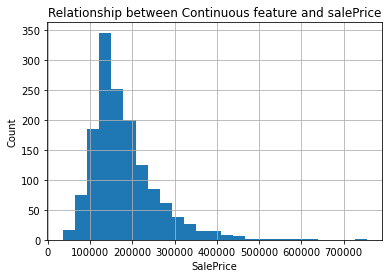

In [17]:

for feature in continuous_feature:
    dataset = data.copy()
    dataset[feature].hist(bins=25)
    plt.title('Relationship between Continuous feature and salePrice')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

 ## Exploratory Data Analysis Part 2

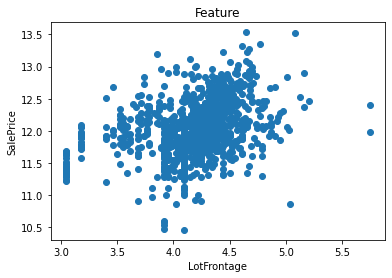

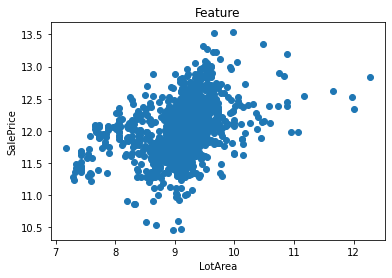

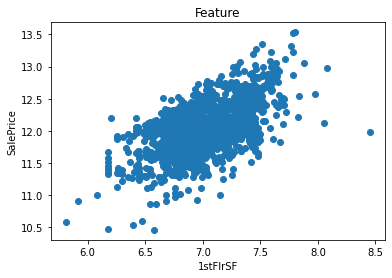

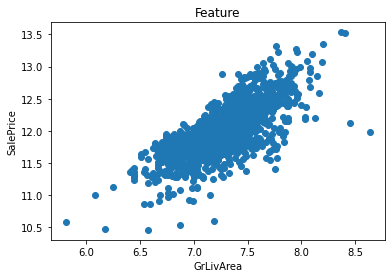

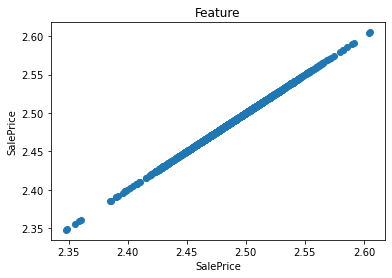

In [18]:
# we will implement logarithm transformation

for feature in continuous_feature:
    dataset = data.copy()
    
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature] = np.log(dataset[feature])
        dataset['SalePrice'] = np.log(dataset['SalePrice'])
        plt.scatter(dataset[feature],dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title('Feature')
        plt.show()

## Time to find out outliers

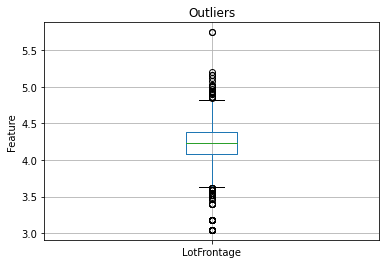

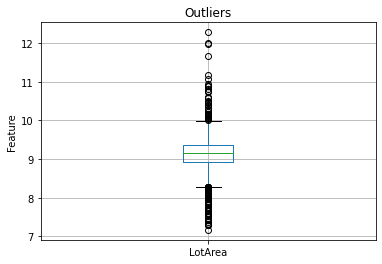

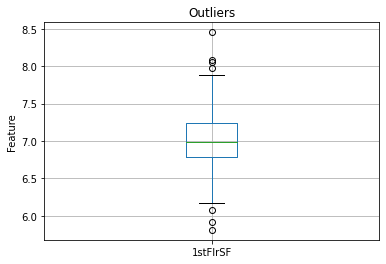

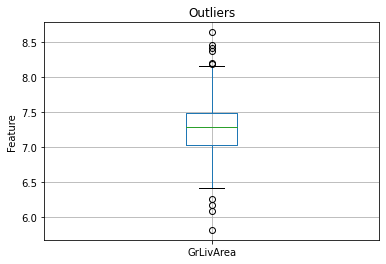

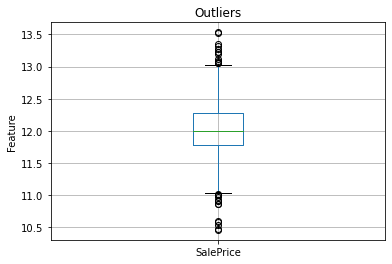

In [19]:
#Apply only for continuous variables 
for feature in continuous_feature:
    dataset = data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature] = np.log(dataset[feature])
        dataset.boxplot(column=feature)
        plt.title("Outliers")
        plt.ylabel('Feature')
        plt.show()

### Categorical features

In [20]:
# Data type of categorical varaible is OBJECT,so we will chcek wheather feature type is O or not

categorical_feature = [feature for feature in data.columns if data[feature].dtypes=='O']
print(f"No of Categorical Feature {len(categorical_feature)}")

No of Categorical Feature 43


In [21]:
for feature in categorical_feature:
    print(f"Feature {feature} has {dataset[feature].nunique()} unique category")

Feature MSZoning has 5 unique category
Feature Street has 2 unique category
Feature Alley has 2 unique category
Feature LotShape has 4 unique category
Feature LandContour has 4 unique category
Feature Utilities has 2 unique category
Feature LotConfig has 5 unique category
Feature LandSlope has 3 unique category
Feature Neighborhood has 25 unique category
Feature Condition1 has 9 unique category
Feature Condition2 has 8 unique category
Feature BldgType has 5 unique category
Feature HouseStyle has 8 unique category
Feature RoofStyle has 6 unique category
Feature RoofMatl has 8 unique category
Feature Exterior1st has 15 unique category
Feature Exterior2nd has 16 unique category
Feature MasVnrType has 4 unique category
Feature ExterQual has 4 unique category
Feature ExterCond has 5 unique category
Feature Foundation has 6 unique category
Feature BsmtQual has 4 unique category
Feature BsmtCond has 4 unique category
Feature BsmtExposure has 4 unique category
Feature BsmtFinType1 has 6 unique

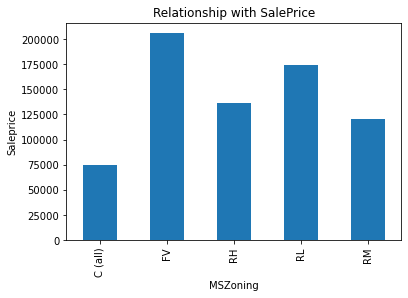

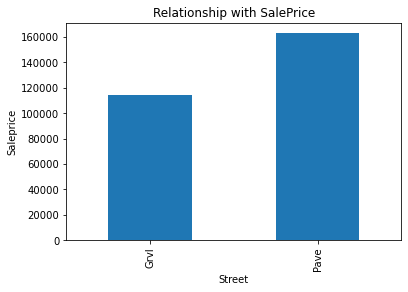

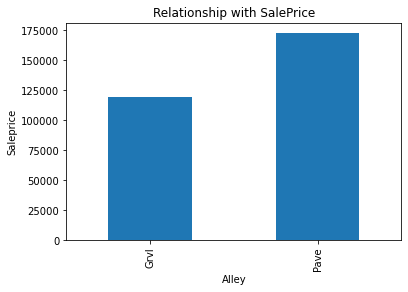

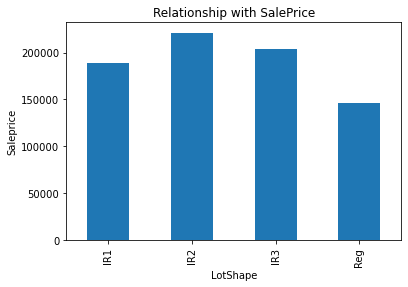

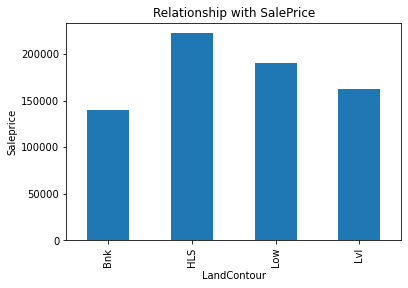

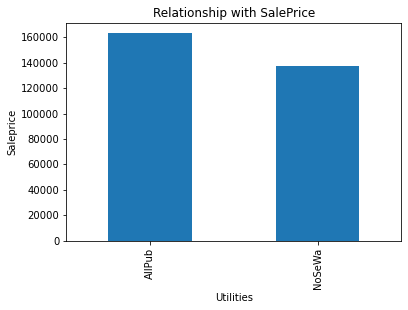

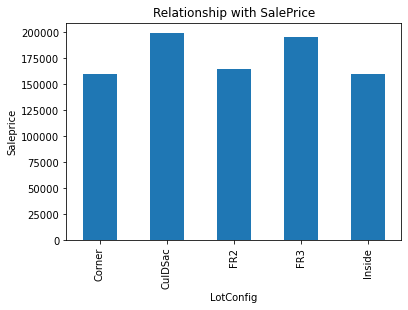

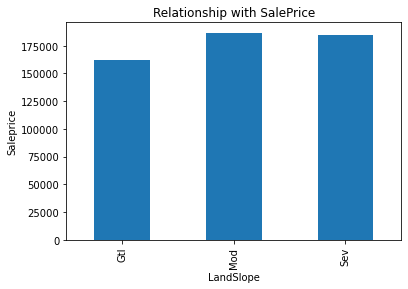

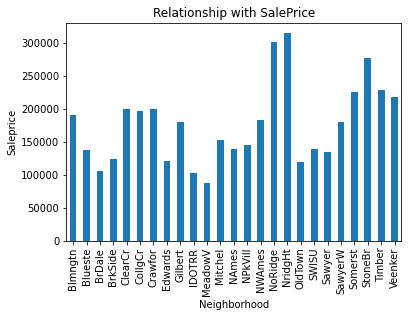

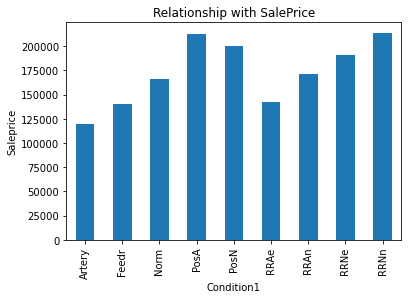

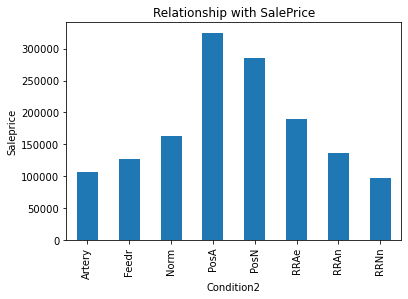

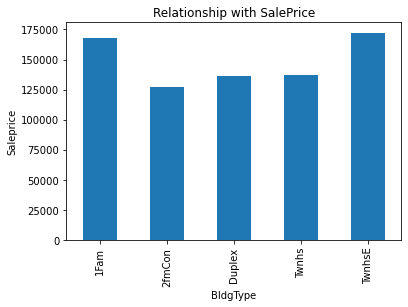

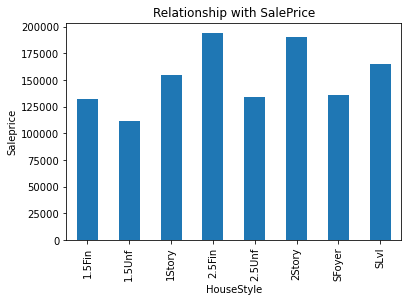

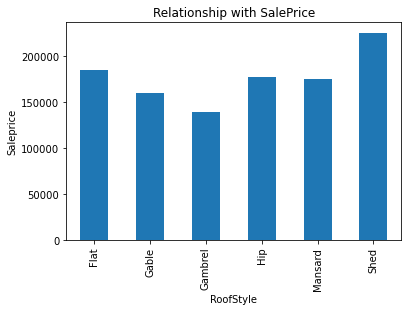

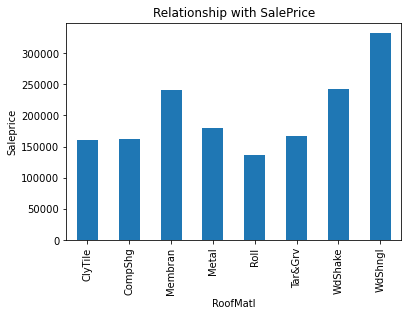

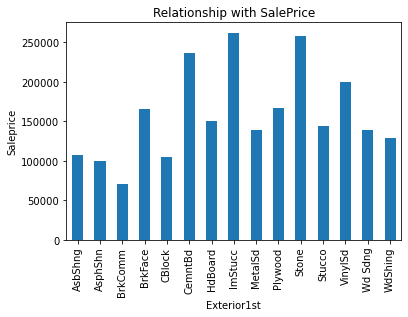

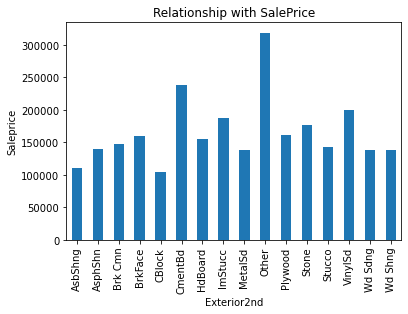

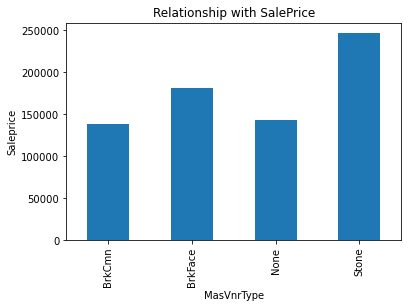

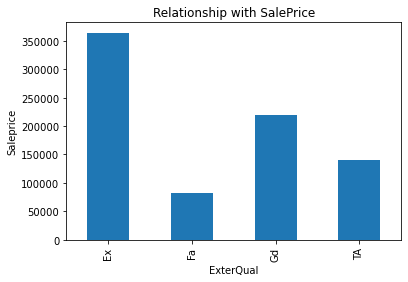

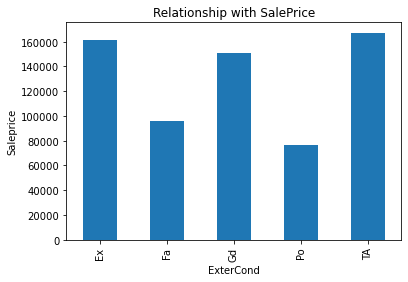

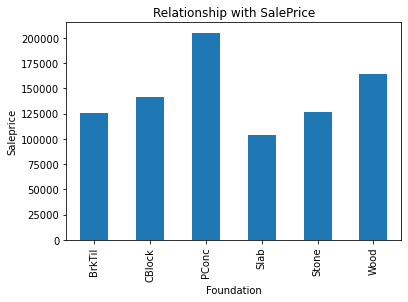

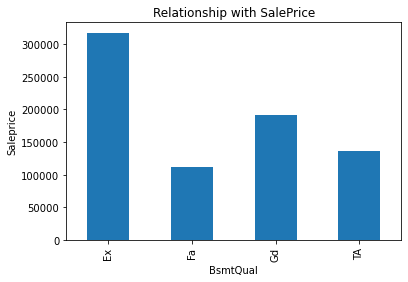

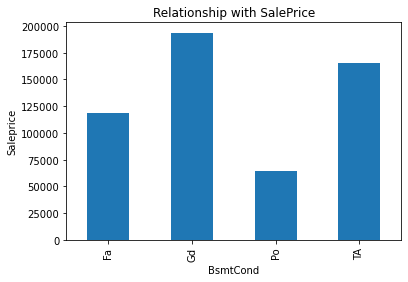

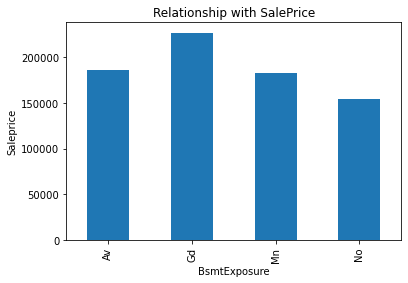

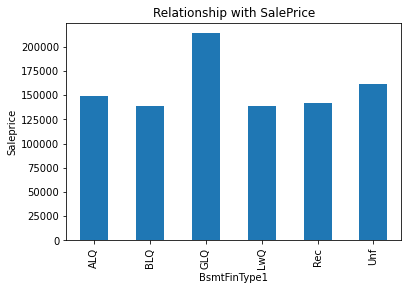

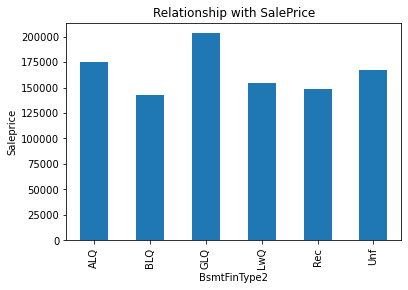

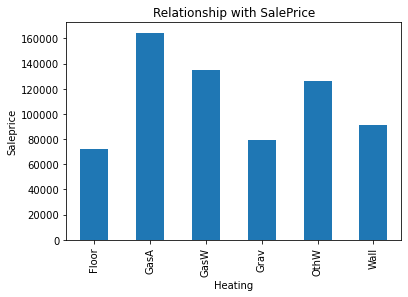

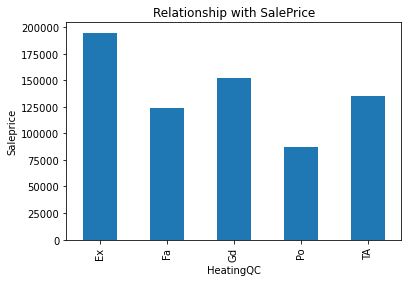

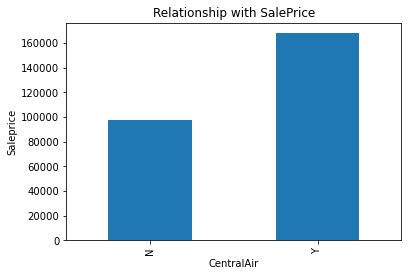

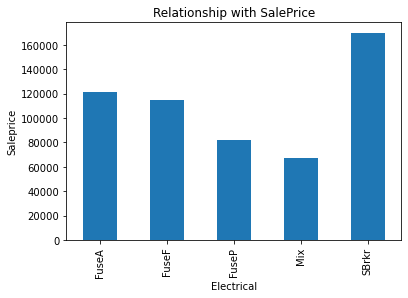

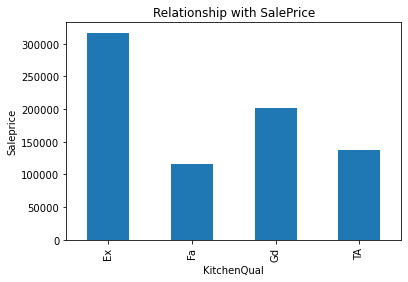

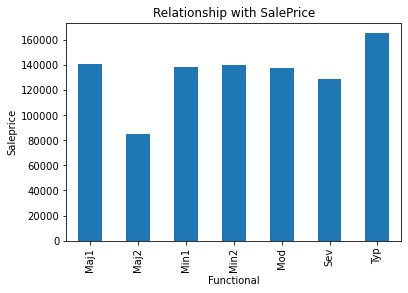

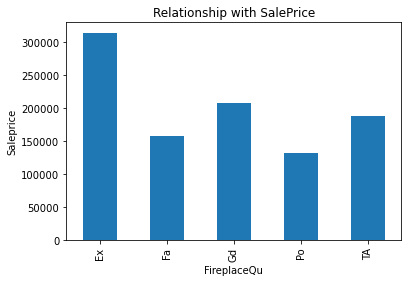

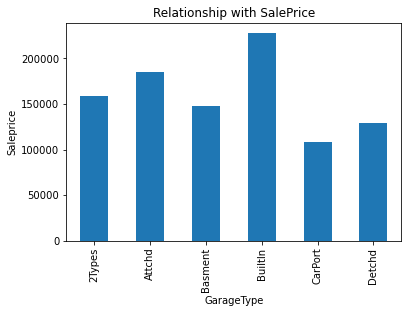

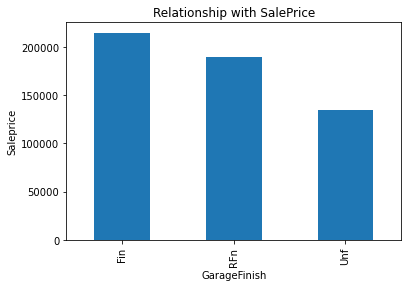

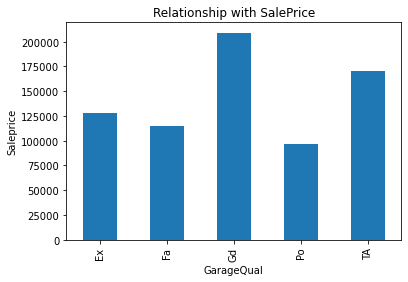

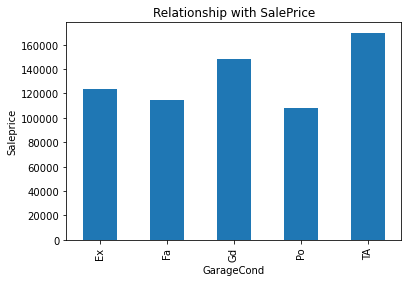

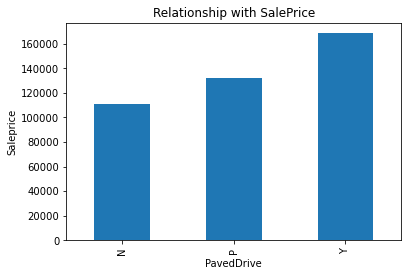

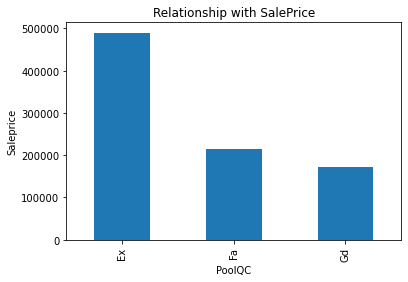

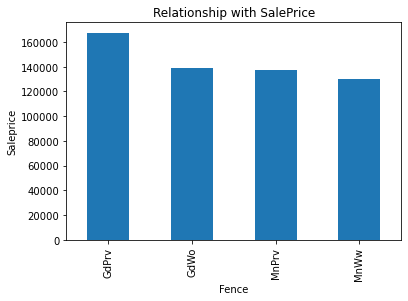

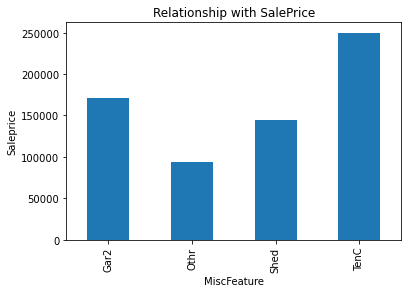

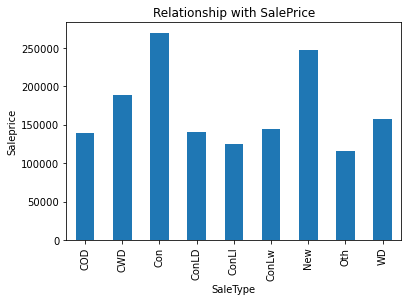

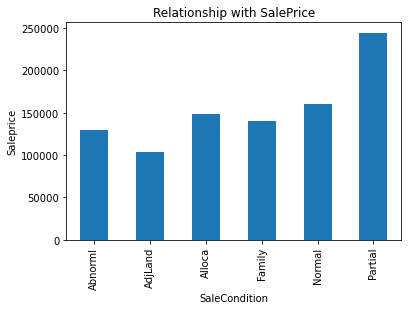

In [28]:
# let's see the relationship between categorical Variables and SalePrice

for feature in categorical_feature:
    dataset = data.copy()
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title("Relationship with SalePrice")
    plt.xlabel(feature)
    plt.ylabel('Saleprice')
    plt.show()

## Feature Engineering